# date

In [1]:
import pandas as pd
import pymongo
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용

client=pymongo.MongoClient("192.168.10.240",27017)
db= client['AI_LKJ']
collection_tour_pass_consume = db['data_tour_pass_total_consume']
data_tour_pass_consume = collection_tour_pass_consume.find()
df_tour_pass_consume = pd.DataFrame(data_tour_pass_consume)

In [2]:
df_tour_pass_consume.head()

,_id,date,total_consume,region
0,66416c052fd6bba041cf13b7,201912,763000000,경기
1,66416c052fd6bba041cf13b8,201901,679000000,경기
2,66416c052fd6bba041cf13b9,201902,638000000,경기
3,66416c052fd6bba041cf13ba,201903,780000000,경기
4,66416c052fd6bba041cf13bb,201904,732000000,경기


In [3]:
df_tour_pass_consume['region'].unique()

array(['경기', '강원', '부산', '제주'], dtype=object)

In [4]:
df_tour_pass_consume.columns

Index(['_id', 'date', 'total_consume', 'region'], dtype='object')

In [5]:
df_tour_pass_consume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   _id            240 non-null    object
 1   date           240 non-null    int64 
 2   total_consume  240 non-null    int64 
 3   region         240 non-null    object
dtypes: int64(2), object(2)
memory usage: 7.6+ KB


In [6]:
df_tour_pass_consume['date'] = pd.to_datetime(df_tour_pass_consume['date'], format="%Y%m")
df_tour_pass_consume['date_year'] = df_tour_pass_consume['date'].dt.year
df_tour_pass_consume['date_month'] = df_tour_pass_consume['date'].dt.month

In [7]:
df_tour_pass_consume

,_id,date,total_consume,region,date_year,date_month
0,66416c052fd6bba041cf13b7,2019-12-01,763000000,경기,2019,12
1,66416c052fd6bba041cf13b8,2019-01-01,679000000,경기,2019,1
2,66416c052fd6bba041cf13b9,2019-02-01,638000000,경기,2019,2
3,66416c052fd6bba041cf13ba,2019-03-01,780000000,경기,2019,3
4,66416c052fd6bba041cf13bb,2019-04-01,732000000,경기,2019,4
...,...,...,...,...,...,...
235,66416c052fd6bba041cf14a2,2023-07-01,91300000,제주,2023,7
236,66416c052fd6bba041cf14a3,2023-08-01,103000000,제주,2023,8
237,66416c052fd6bba041cf14a4,2023-09-01,81500000,제주,2023,9
238,66416c052fd6bba041cf14a5,2023-10-01,93000000,제주,2023,10


# 투어패스가 등장한 시점
- 강릉(강원) : 2023년 7월
- 경기 : 2023년 7월
- 부산 : 2022년 2월
- 제주 : 2021년 3월 

## 강원 투어패스 : 2023년 7월

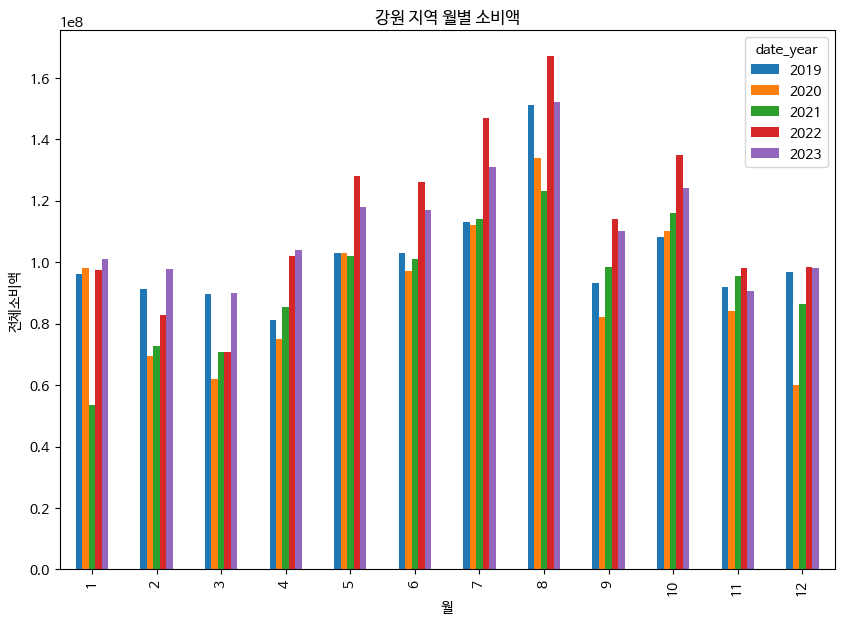

In [8]:
df_tour_pass_consume_kangwon = df_tour_pass_consume[df_tour_pass_consume['region'] == '강원']

pivot_visitor_kangwon = pd.pivot_table(data=df_tour_pass_consume_kangwon, index="date_month", columns='date_year', values='total_consume', aggfunc='sum')
# ax = pivot_visitor_kangwon.plot(kind='line', figsize=(10, 7))
ax = pivot_visitor_kangwon.plot(kind='bar', figsize=(10, 7))
# ax = pivot_visitor_kangwon.plot(kind='area', figsize=(12, 7))
plt.title('강원 지역 월별 소비액')
plt.xlabel('월')
plt.ylabel('전체소비액')
plt.show()

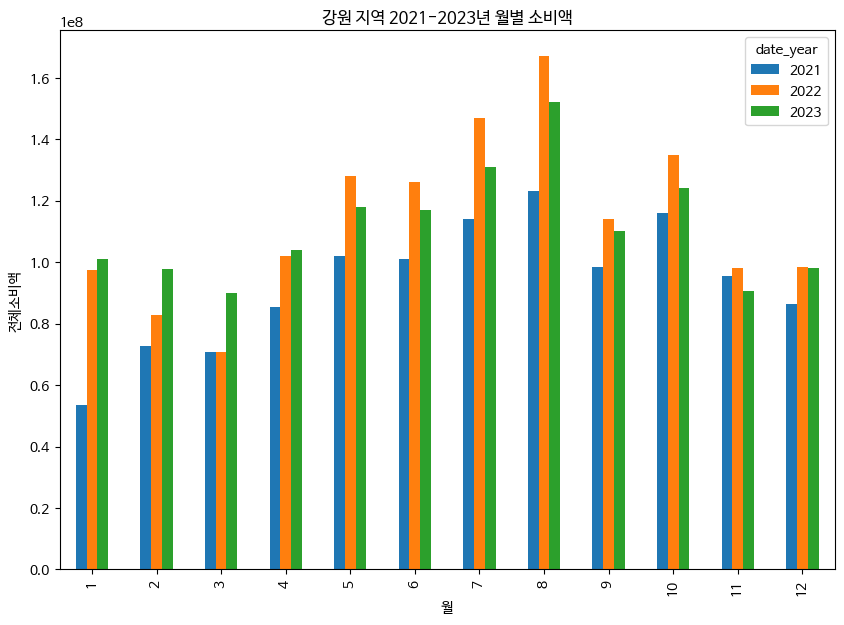

In [9]:
df_tour_pass_consume_kangwon = df_tour_pass_consume[df_tour_pass_consume['region'] == '강원']

# 2021년부터 2023년까지의 데이터로 필터링
selected_years = [2021, 2022, 2023]
df_tour_pass_consume_kangwon_selected = df_tour_pass_consume_kangwon[df_tour_pass_consume_kangwon['date_year'].isin(selected_years)]

pivot_visitor_kangwon_selected = pd.pivot_table(data=df_tour_pass_consume_kangwon_selected, index="date_month", columns='date_year', values='total_consume', aggfunc='sum')
# ax = pivot_visitor_kangwon.plot(kind='line', figsize=(10, 7))
ax = pivot_visitor_kangwon_selected.plot(kind='bar', figsize=(10, 7))
# ax = pivot_visitor_kangwon.plot(kind='area', figsize=(12, 7))
plt.title('강원 지역 2021-2023년 월별 소비액')
plt.xlabel('월')
plt.ylabel('전체소비액')
plt.show()

In [28]:
# 2022년, 2023년 데이터에서 전년도 대비률
total_consume_2022_march_to_december = df_tour_pass_consume_kangwon_selected[(df_tour_pass_consume_kangwon_selected['date_year'] == 2022) & (df_tour_pass_consume_kangwon_selected['date_month'] >= 7) & (df_tour_pass_consume_kangwon_selected['date_month'] >= 12)]['total_consume'].sum()
total_consume_2023_march_to_december = df_tour_pass_consume_kangwon_selected[(df_tour_pass_consume_kangwon_selected['date_year'] == 2023) & (df_tour_pass_consume_kangwon_selected['date_month'] >= 7) & (df_tour_pass_consume_kangwon_selected['date_month'] <= 12)]['total_consume'].sum()
comparison_2022_2023 = (total_consume_2022_march_to_december / total_consume_2023_march_to_december)*100
print("전년도 대비률:", comparison_2022_2023)

전년도 대비률: 13.94162652309436


## 경기 투어패스 : 2023년 7월

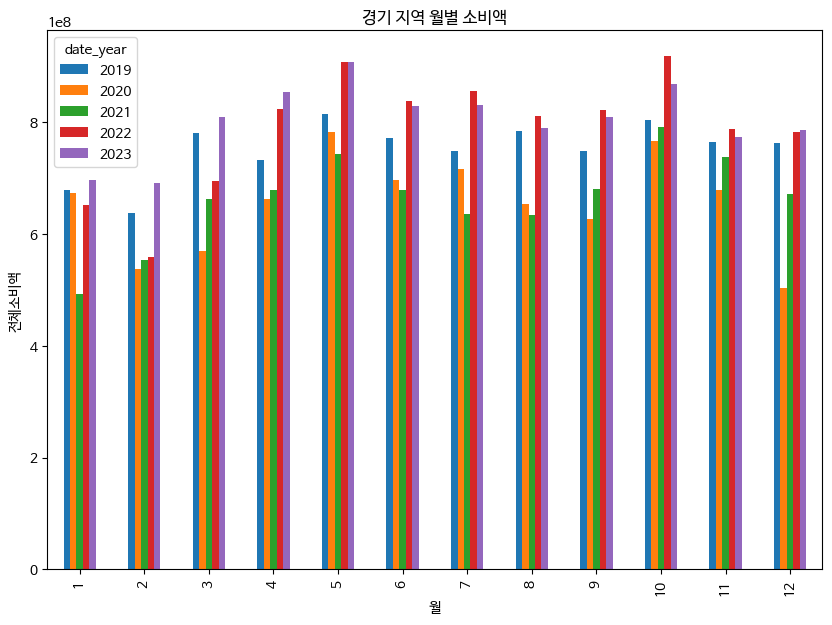

In [11]:
df_tour_pass_consume_gyeonggi = df_tour_pass_consume[df_tour_pass_consume['region'] == '경기']

pivot_visitor_gyeonggi = pd.pivot_table(data=df_tour_pass_consume_gyeonggi, index="date_month", columns='date_year', values='total_consume', aggfunc='sum')
# ax = pivot_visitor_gyeonggi.plot(kind='line', figsize=(10, 7))
ax = pivot_visitor_gyeonggi.plot(kind='bar', figsize=(10, 7))
# ax = pivot_visitor_gyeonggi.plot(kind='area', figsize=(12, 7))
plt.title('경기 지역 월별 소비액')
plt.xlabel('월')
plt.ylabel('전체소비액')
plt.show()

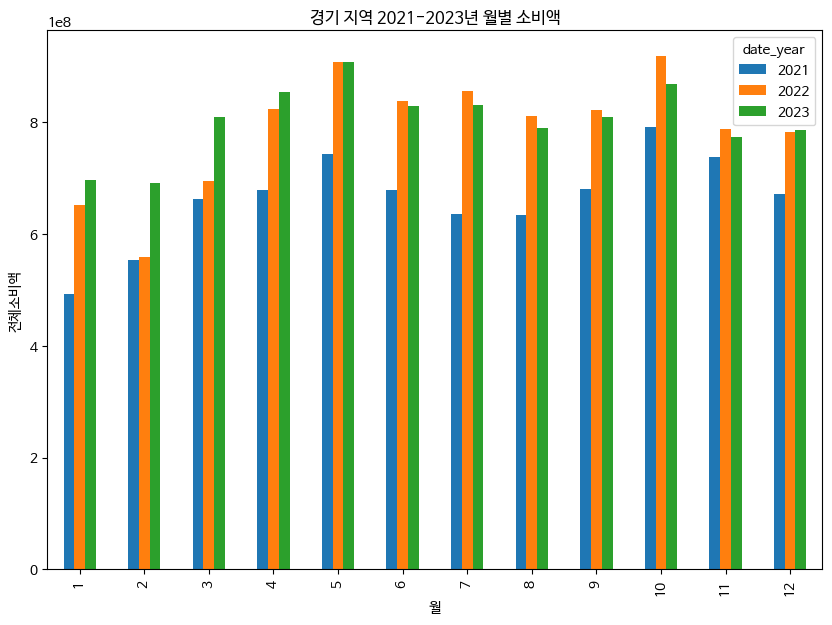

In [12]:
df_tour_pass_consume_gyeonggi = df_tour_pass_consume[df_tour_pass_consume['region'] == '경기']

# 2021년부터 2023년까지의 데이터로 필터링
selected_years = [2021, 2022, 2023]
df_tour_pass_consume_gyeonggi_selected = df_tour_pass_consume_gyeonggi[df_tour_pass_consume_gyeonggi['date_year'].isin(selected_years)]

pivot_visitor_gyeonggi_selected = pd.pivot_table(data=df_tour_pass_consume_gyeonggi_selected, index="date_month", columns='date_year', values='total_consume', aggfunc='sum')
# ax = pivot_visitor_gyeonggi_selected.plot(kind='line', figsize=(10, 7))
ax = pivot_visitor_gyeonggi_selected.plot(kind='bar', figsize=(10, 7))
# ax = pivot_visitor_gyeonggi_selected.plot(kind='area', figsize=(12, 7))
plt.title('경기 지역 2021-2023년 월별 소비액')
plt.xlabel('월')
plt.ylabel('전체소비액')
plt.show()

In [29]:
# 2022년, 2023년 데이터에서 전년도 대비률
total_consume_2022_march_to_december = df_tour_pass_consume_gyeonggi_selected[(df_tour_pass_consume_gyeonggi_selected['date_year'] == 2022) & (df_tour_pass_consume_gyeonggi_selected['date_month'] >= 7) & (df_tour_pass_consume_gyeonggi_selected['date_month'] >= 12)]['total_consume'].sum()
total_consume_2023_march_to_december = df_tour_pass_consume_gyeonggi_selected[(df_tour_pass_consume_gyeonggi_selected['date_year'] == 2023) & (df_tour_pass_consume_gyeonggi_selected['date_month'] >= 7) & (df_tour_pass_consume_gyeonggi_selected['date_month'] <= 12)]['total_consume'].sum()
comparison_2022_2023 = (total_consume_2022_march_to_december / total_consume_2023_march_to_december)*100
print("전년도 대비률:", comparison_2022_2023)

전년도 대비률: 16.12106238418777


## 부산 투어패스 : 2022년 2월

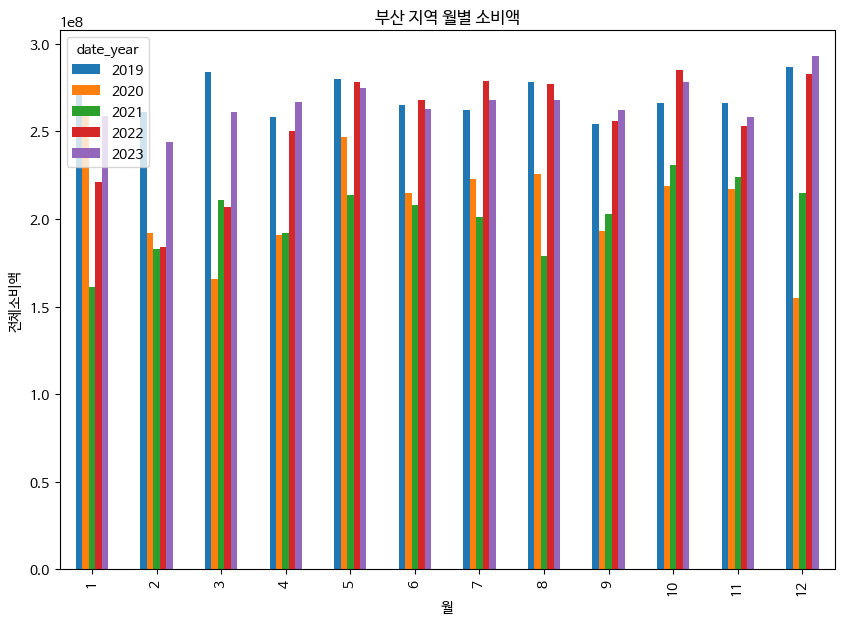

In [14]:
df_tour_pass_consume_busan = df_tour_pass_consume[df_tour_pass_consume['region'] == '부산']

pivot_visitor_busan = pd.pivot_table(data=df_tour_pass_consume_busan, index="date_month", columns='date_year', values='total_consume', aggfunc='sum')
# ax = pivot_visitor_kangwon.plot(kind='line', figsize=(10, 7))
ax = pivot_visitor_busan.plot(kind='bar', figsize=(10, 7))
# ax = pivot_visitor_kangwon.plot(kind='area', figsize=(12, 7))
plt.title('부산 지역 월별 소비액')
plt.xlabel('월')
plt.ylabel('전체소비액')
plt.show()

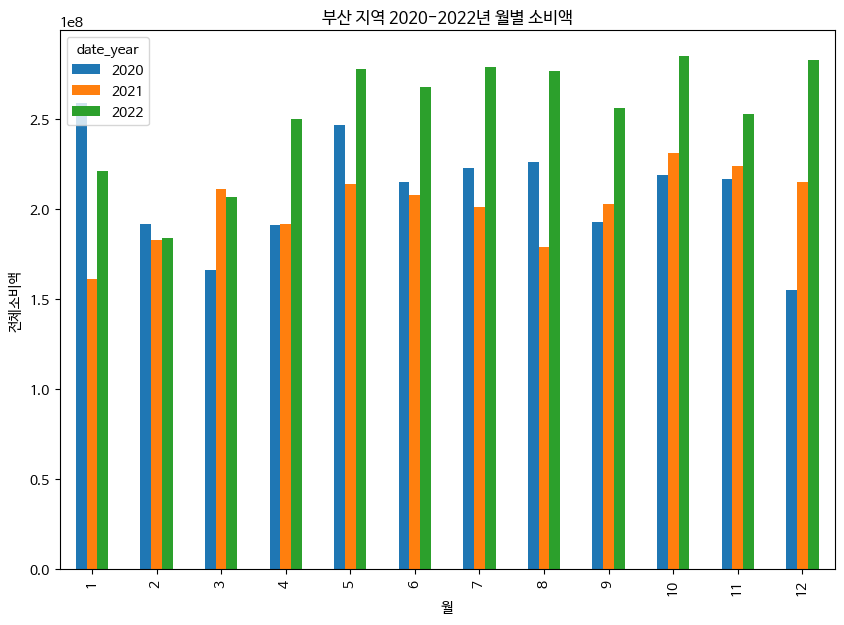

In [15]:
df_tour_pass_consume_busan = df_tour_pass_consume[df_tour_pass_consume['region'] == '부산']

# 2021년부터 2023년까지의 데이터로 필터링
selected_years = [2020, 2021, 2022]
df_tour_pass_consume_busan_selected = df_tour_pass_consume_busan[df_tour_pass_consume_busan['date_year'].isin(selected_years)]

pivot_visitor_busan_selected = pd.pivot_table(data=df_tour_pass_consume_busan_selected, index="date_month", columns='date_year', values='total_consume', aggfunc='sum')
# ax = pivot_visitor_busan_selected.plot(kind='line', figsize=(10, 7))
ax = pivot_visitor_busan_selected.plot(kind='bar', figsize=(10, 7))
# ax = pivot_visitor_busan_selected.plot(kind='area', figsize=(12, 7))
plt.title('부산 지역 2020-2022년 월별 소비액')
plt.xlabel('월')
plt.ylabel('전체소비액')
plt.show()

In [36]:
# 2021년, 2022년 데이터에서 전년도 대비률
total_consume_2021_march_to_december = df_tour_pass_consume_busan_selected[(df_tour_pass_consume_busan_selected['date_year'] == 2021) & (df_tour_pass_consume_busan_selected['date_month'] >= 2) & (df_tour_pass_consume_busan_selected['date_month'] <= 12)]['total_consume'].sum()
total_consume_2022_march_to_december = df_tour_pass_consume_busan_selected[(df_tour_pass_consume_busan_selected['date_year'] == 2022) & (df_tour_pass_consume_busan_selected['date_month'] >= 2) & (df_tour_pass_consume_busan_selected['date_month'] <= 12)]['total_consume'].sum()
comparison_2021_2022 = (total_consume_2021_march_to_december / total_consume_2022_march_to_december)*100
print("전년도 대비률:", comparison_2021_2022)

전년도 대비률: 80.177304964539


## 제주 투어패스 : 2021년 3월

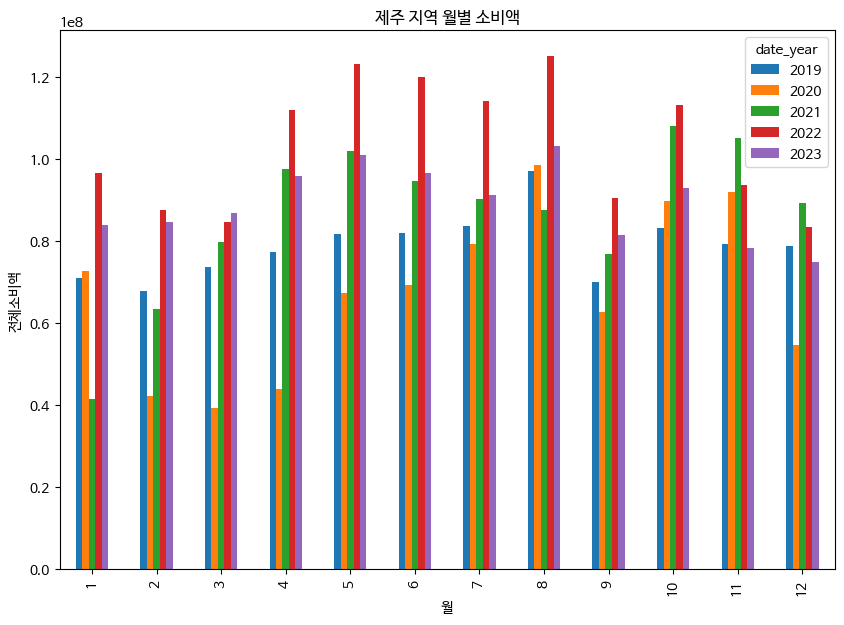

In [17]:
df_tour_pass_consume_jeju = df_tour_pass_consume[df_tour_pass_consume['region'] == '제주']

pivot_visitor_jeju = pd.pivot_table(data=df_tour_pass_consume_jeju, index="date_month", columns='date_year', values='total_consume', aggfunc='sum')
# ax = pivot_visitor_jeju.plot(kind='line', figsize=(10, 7))
ax = pivot_visitor_jeju.plot(kind='bar', figsize=(10, 7))
# ax = pivot_visitor_jeju.plot(kind='area', figsize=(12, 7))
plt.title('제주 지역 월별 소비액')
plt.xlabel('월')
plt.ylabel('전체소비액')
plt.show()

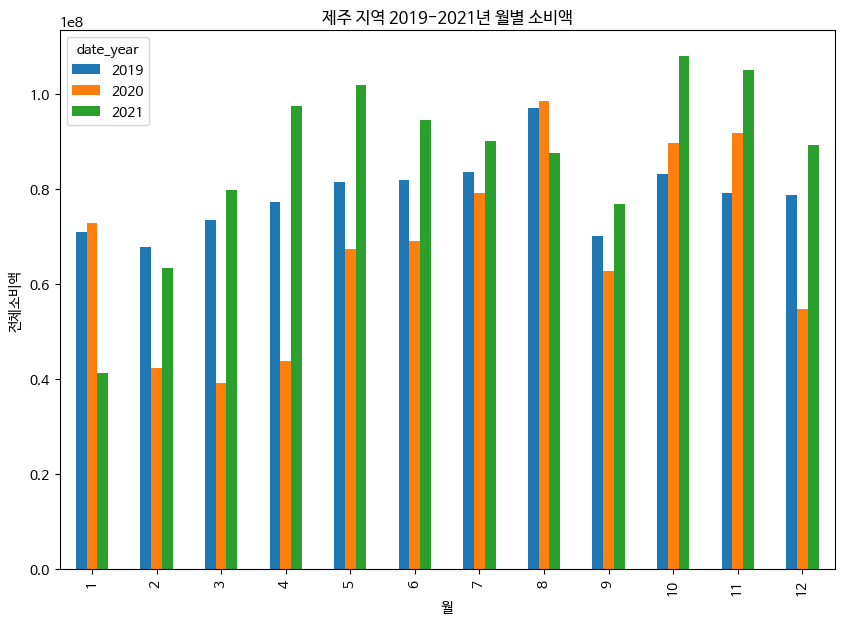

In [18]:
df_tour_pass_consume_jeju = df_tour_pass_consume[df_tour_pass_consume['region'] == '제주']

# 2021년부터 2023년까지의 데이터로 필터링
selected_years = [2019, 2020, 2021]
df_tour_pass_consume_jeju_selected = df_tour_pass_consume_jeju[df_tour_pass_consume_jeju['date_year'].isin(selected_years)]

pivot_visitor_jeju_selected = pd.pivot_table(data=df_tour_pass_consume_jeju_selected, index="date_month", columns='date_year', values='total_consume', aggfunc='sum')
# ax = pivot_visitor_jeju_selected.plot(kind='line', figsize=(10, 7))
ax = pivot_visitor_jeju_selected.plot(kind='bar', figsize=(10, 7))
# ax = pivot_visitor_jeju_selected.plot(kind='area', figsize=(12, 7))
plt.title('제주 지역 2019-2021년 월별 소비액')
plt.xlabel('월')
plt.ylabel('전체소비액')
plt.show()

In [35]:
# 2020년, 2021년 데이터에서 전년도 대비률
total_consume_2020_march_to_december = df_tour_pass_consume_jeju_selected[(df_tour_pass_consume_jeju_selected['date_year'] == 2020) & (df_tour_pass_consume_jeju_selected['date_month'] >= 3) & (df_tour_pass_consume_jeju_selected['date_month'] <= 12)]['total_consume'].sum()
total_consume_2021_march_to_december = df_tour_pass_consume_jeju_selected[(df_tour_pass_consume_jeju_selected['date_year'] == 2021) & (df_tour_pass_consume_jeju_selected['date_month'] >= 3) & (df_tour_pass_consume_jeju_selected['date_month'] <= 12)]['total_consume'].sum()
comparison_2020_2021 = (total_consume_2020_march_to_december / total_consume_2021_march_to_december)*100
print("전년도 대비률:", comparison_2020_2021)

전년도 대비률: 74.8495917490331


# 결론 - 투어패스 적용 이후 전년도 대비 소비액 비교

+ 강원지역(23년 7월) + 전년도대비 감소 : -13.94%

+ 경기지역(23년 7월) + 전년도대비 감소 : -16.12%

+ 부산지역(22년 2월) + 전년도대비 증가 : +80.18%

+ 제주지역(21년 3월) + 전년도대비 8월을 제외한 증가 : +74.84%